In [1]:
import scSherlock as sh
import scanpy as sc
import warnings
warnings.filterwarnings('ignore')

# Marker detection with sCherlock

Here we will use a published scRNAseq atlas of the normal human breast
https://www.nature.com/articles/s41588-024-01688-9

The integrated dataset can be downloaded as a h5ad file from https://cellxgene.cziscience.com/collections/48259aa8-f168-4bf5-b797-af8e88da6637 

In [2]:
# Load the data
adata = sc.read_h5ad("/home/croizer/Downloads/HBCA_reed_2024.h5ad")
cell_type_column = "author_cell_type"
patient_column = "donor_id"

This atlas covers 58 cell types with 714 331 cells 

In [3]:
# Default features are ENSEMBL_ID, changing to gene names for interpretability
adata.var_names = adata.var['feature_name'].values

We recommend removing cell states caracterized by cell cycle activation as they do not represent cell types

In [4]:
to_remove = ['T_prol', 'mye-prol']
# Create a boolean mask for cells to keep (those NOT in the to_remove list)
mask = ~adata.obs['author_cell_type'].isin(to_remove)
# Subset the AnnData object
adata = adata[mask].copy()

Here we create the SCherlock object, Scherlock requires the raw counts as input for the adata.X 

In [5]:
# Initialize SCherlock
scherlock = sh.ScSherlock(
    adata=adata, # AnnData object
    column_patient=patient_column  # Column name for patient IDs
)

2025-05-14 16:20:26,089 - ScSherlock - INFO - ScSherlock initialized with (713666, 33145) data matrix


We can now run sCherlock on a given annotation column to identify specific marker genes

In [6]:
top_markers = scherlock.run(column_ctype="author_cell_type", bootstrap=False)

2025-05-14 16:20:27,383 - ScSherlock - INFO - Calculating theoretical scores for author_cell_type...
Aggregating Samples: 100%|██████████| 7056/7056 [00:03<00:00, 2050.96it/s]
2025-05-14 16:21:33,045 - ScSherlock - INFO - Completed theoretical score calculation
2025-05-14 16:21:33,046 - ScSherlock - INFO - Applying multi-category correction...
2025-05-14 16:21:33,206 - ScSherlock - INFO - Aggregating scores...
2025-05-14 16:21:33,349 - ScSherlock - INFO - Sorting scores...
2025-05-14 16:21:34,003 - ScSherlock - INFO - Filtering genes...
Aggregating Samples: 100%|██████████| 56/56 [00:03<00:00, 16.87it/s]
2025-05-14 16:21:44,454 - ScSherlock - INFO - Calculating empirical scores...
2025-05-14 16:24:08,029 - ScSherlock - INFO - Aggregating empirical scores...
2025-05-14 16:24:08,039 - ScSherlock - INFO - Sorting empirical scores...
2025-05-14 16:24:08,668 - ScSherlock - INFO - Identifying top markers...
2025-05-14 16:24:08,670 - ScSherlock - INFO - ScSherlock completed. Found markers for

## Basic plotting 

2025-05-14 16:25:08,446 - ScSherlock - INFO - Plotting 50 genes for 50 cell types using empiric model


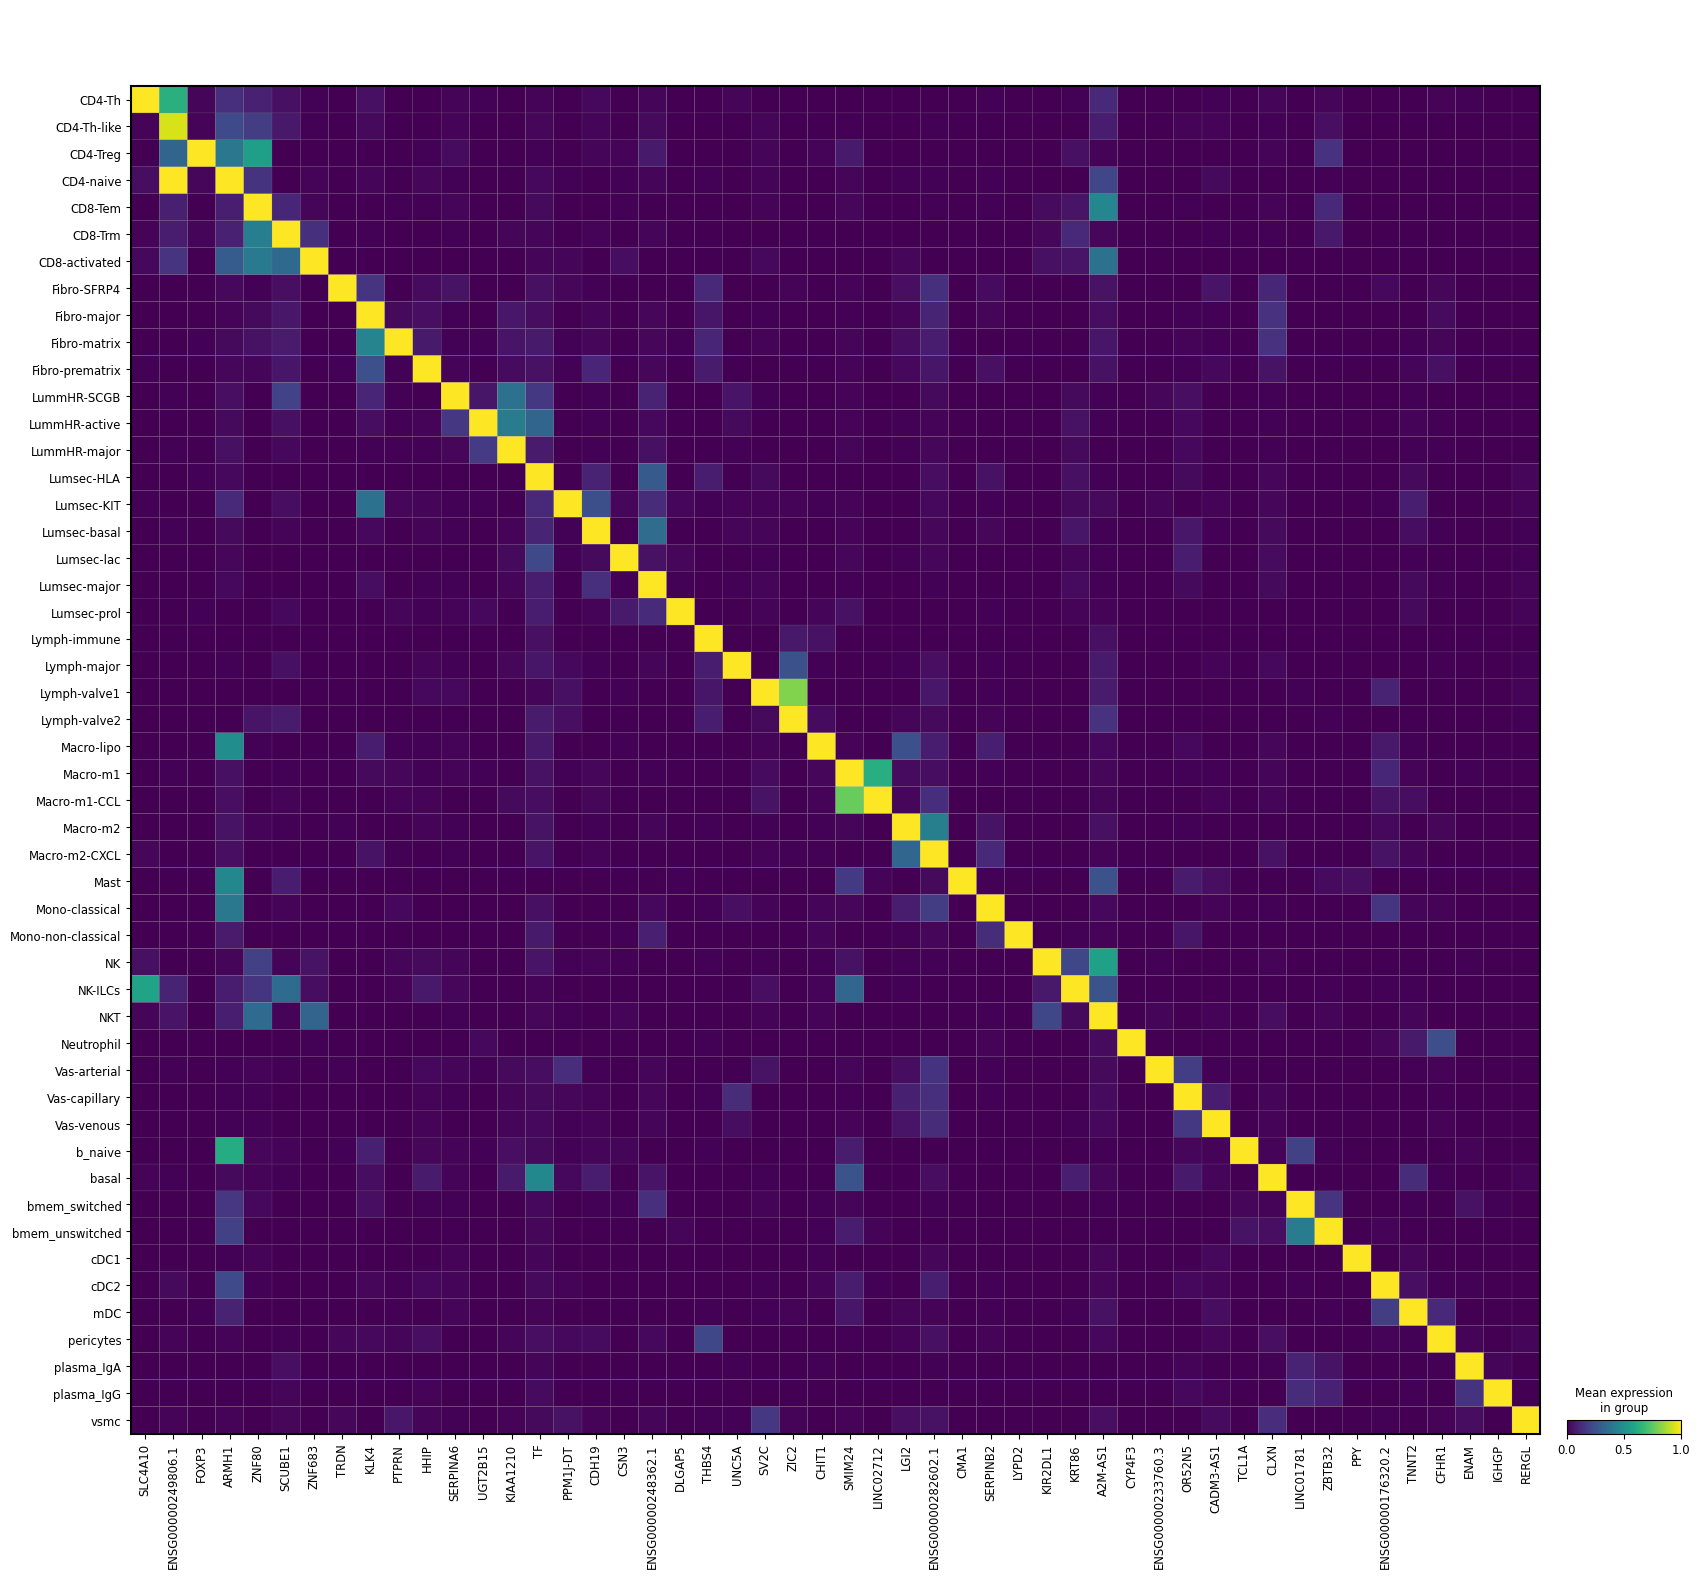

In [12]:
# Show top marker for each cell type, without selecting on a cutoff value
scherlock.plot_marker_heatmap(n_genes=1, column_ctype=cell_type_column, cutoff=0,remove_ctype_no_marker=True)

2025-05-14 16:28:52,396 - ScSherlock - INFO - Plotting 89 genes for 46 cell types using empiric model


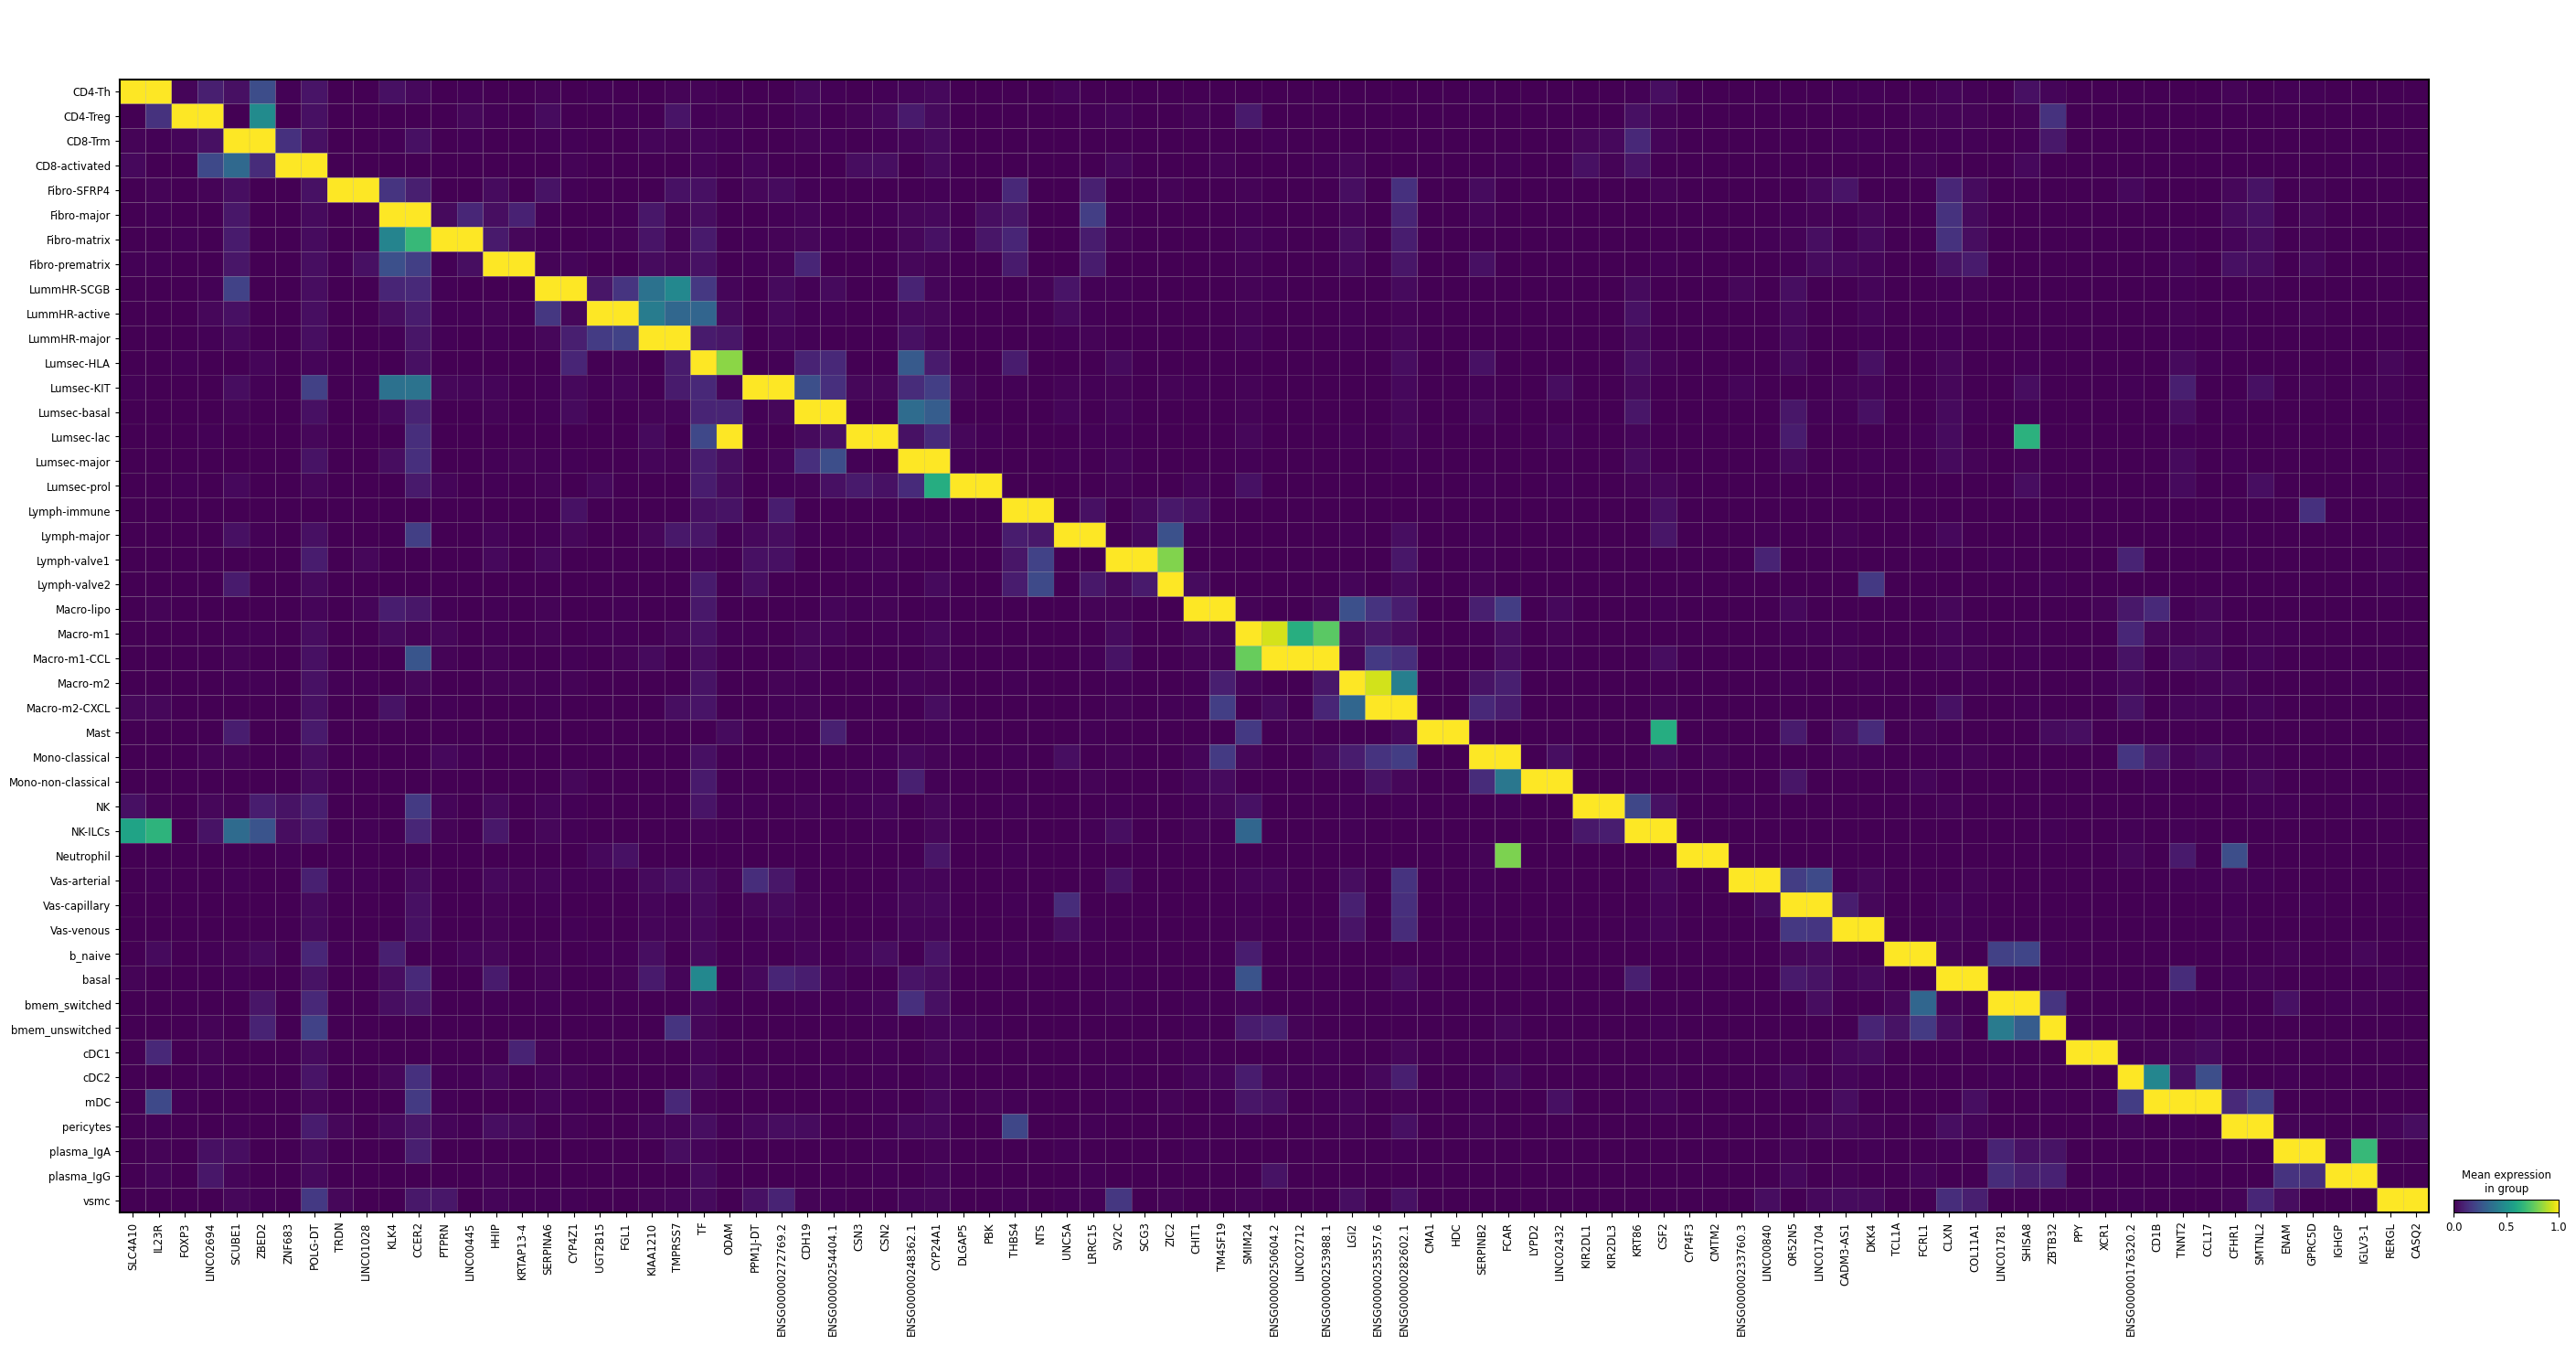

In [13]:
# Show top three markers for each cell type passing cutoff, only display cell types with markers
scherlock.plot_marker_heatmap(n_genes=2, column_ctype=cell_type_column, cutoff=0.3,remove_ctype_no_marker=True)

## Exporting results 

In [9]:
# get top markers for each cell type
scherlock.get_marker(column_ctype='author_cell_type')

,cell_type,marker_gene,score,method,expression_proportion
19,CD4-Th,SLC4A10,0.593554,empiric,4.466280e-05
18,CD4-Th-like,ENSG00000249806.1,0.263222,empiric,6.291989e-06
20,CD4-Treg,FOXP3,0.854520,empiric,1.829449e-04
17,CD4-naive,ARMH1,0.170593,empiric,3.864055e-05
16,CD8-Tem,ZNF80,0.295944,empiric,2.285995e-05
21,CD8-Trm,SCUBE1,0.456462,empiric,2.423227e-05
24,CD8-activated,ZNF683,0.470702,empiric,1.692424e-04
39,Fibro-SFRP4,TRDN,0.942224,empiric,5.728781e-05
37,Fibro-major,KLK4,0.762138,empiric,4.151716e-06
38,Fibro-matrix,PTPRN,0.985178,empiric,1.544483e-05


In [10]:
# get top 3 markers for each cell type
scherlock.get_marker(column_ctype='author_cell_type', n_top_genes=3)

,cell_type,marker_gene,score,method,expression_proportion
53,CD4-Th,SLC4A10,0.593554,empiric,0.000045
54,CD4-Th,IL23R,0.415085,empiric,0.000022
55,CD4-Th,ADAM23,0.396087,empiric,0.000068
50,CD4-Th-like,ENSG00000249806.1,0.263222,empiric,0.000006
51,CD4-Th-like,BRDT,0.242747,empiric,0.000015
...,...,...,...,...,...
36,plasma_IgG,IGHGP,0.838159,empiric,0.000498
38,plasma_IgG,IGHG4,0.501823,empiric,0.002296
136,vsmc,RERGL,1.000000,empiric,0.000434
137,vsmc,CASQ2,1.000000,empiric,0.000210


In [11]:
# Get top 3 markers for each cell type with a score > 0.5
scherlock.get_marker(column_ctype='author_cell_type', n_top_genes=3, min_score=0.5)

,cell_type,marker_gene,score,method,expression_proportion
28,CD4-Th,SLC4A10,0.593554,empiric,0.000045
29,CD4-Treg,FOXP3,0.854520,empiric,0.000183
53,Fibro-SFRP4,TRDN,0.942224,empiric,0.000057
54,Fibro-SFRP4,LINC01028,0.918532,empiric,0.000010
55,Fibro-SFRP4,PAPPA2,0.893300,empiric,0.000088
...,...,...,...,...,...
23,plasma_IgG,IGLV3-1,0.512344,empiric,0.000210
24,plasma_IgG,IGHG4,0.501823,empiric,0.002296
72,vsmc,RERGL,1.000000,empiric,0.000434
73,vsmc,CASQ2,1.000000,empiric,0.000210
